# Graphical illustration of independent and dependent variables

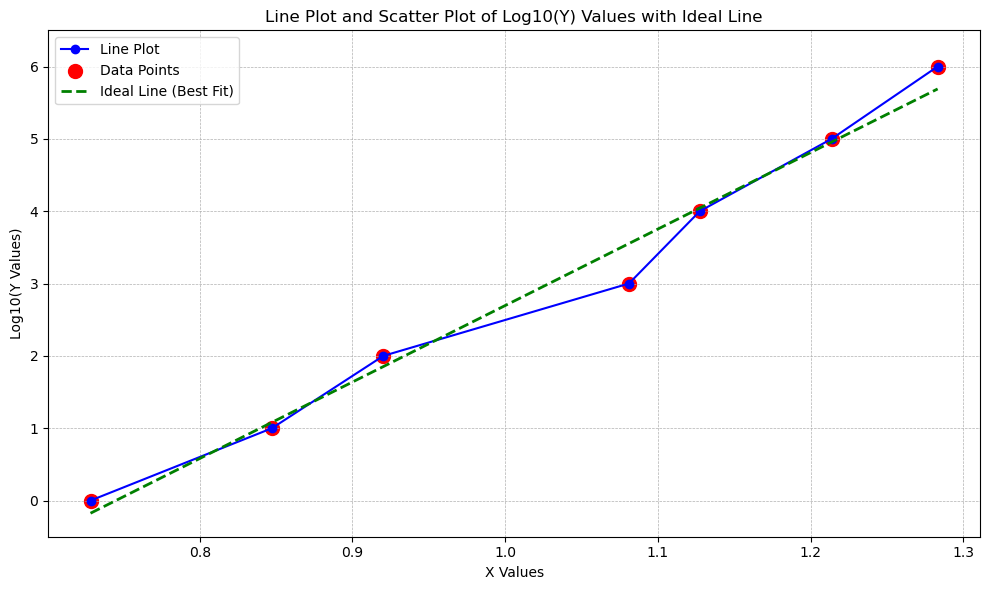

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the dataset
X = np.array([1.2831, 1.2137, 1.1274, 1.0810, 0.9202, 0.8473, 0.7285]).reshape(-1, 1)
test = np.array([10**6, 10**5, 10**4, 10**3, 10**2, 10**1, 10**0])
y = np.log10(test)  # Logarithmic transformation of the y values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict the y values for the line of best fit
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plotting the values
plt.figure(figsize=(10, 6))

# Original line plot
plt.plot(X, y, marker='o', linestyle='-', color='b', label='Line Plot')

# Scatter plot
plt.scatter(X, y, color='red', s=100, label='Data Points')

# Ideal line (line of best fit)
plt.plot(X_fit, y_fit, color='green', linestyle='--', linewidth=2, label='Ideal Line (Best Fit)')

# Set linear scale for y-axis (since y values are already log-transformed)
plt.ylim(min(y) - 0.5, max(y) + 0.5)  # Adjust y-limits for better visibility

plt.xlabel('X Values')
plt.ylabel('Log10(Y Values)')
plt.title('Line Plot and Scatter Plot of Log10(Y) Values with Ideal Line')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


# Train and save the "Linear Regression" Model

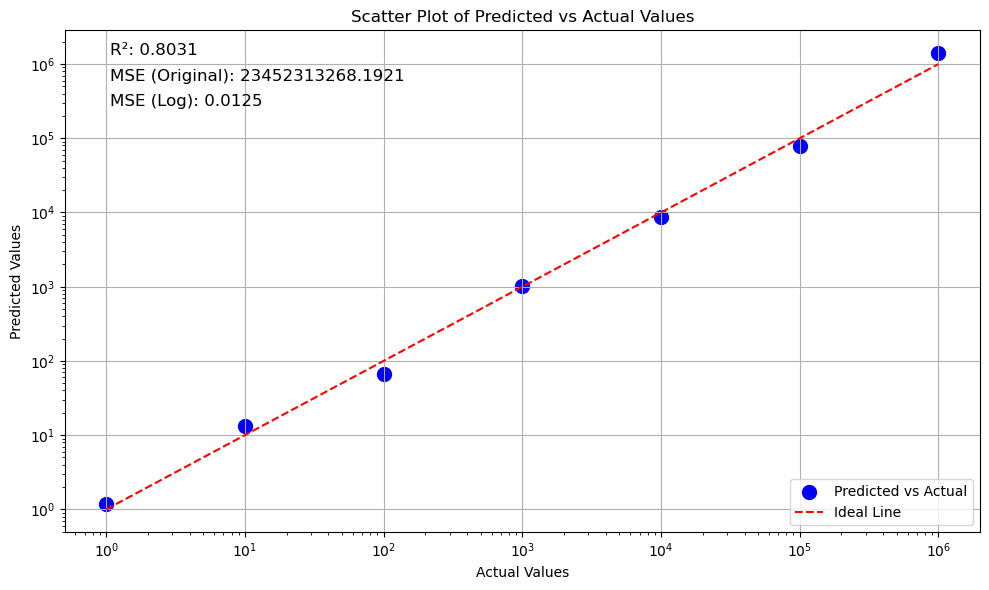

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib  # Import joblib for saving and loading models

# Define the dataset
X = np.array([
    [1.2831, 1.5635, 1.4853],
    [1.2137, 1.3833, 1.3141],
    [1.1274, 1.2511, 1.2142],
    [1.0810, 1.1871, 1.0123],
    [0.9202, 1.0056, 0.9553],
    [0.8473, 0.9229, 0.8757],
    [0.7285, 0.8024, 0.7622]
])

# Calculate the mean for each row
means = np.mean(X, axis=1).reshape(-1, 1)  # Reshape for a single feature

# Define target values and apply log10 transformation
y = np.array([10**6, 10**5, 10**4, 10**3, 10**2, 10**1, 10**0])
y_log = np.log10(y)  # Log-transform the target values
# Scale features
scaler_X = StandardScaler()
means_scaled = scaler_X.fit_transform(means)

# Scale target values
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_log.reshape(-1, 1)).ravel()

# Create and fit the linear regression model
model = LinearRegression()
model.fit(means_scaled, y_scaled)

# Save the model and scalers
joblib.dump(model, '../model/linear_regression_model.pkl_scaled')
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

# Make predictions
y_pred_scaled = model.predict(means_scaled)

# Inverse transform predictions to original scale
y_pred_log = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_pred = 10 ** y_pred_log  # Convert log scale back to original scale

# Calculate R^2 and MSE
r2 = r2_score(y, y_pred)
mse_original = mean_squared_error(y, y_pred)
mse_log = mean_squared_error(y_log, y_pred_log)  # MSE in the log-transformed scale

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of Predicted vs Actual Values
plt.scatter(y, y_pred, color='blue', s=100, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Line')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.xscale('log')  # Use logarithmic scale if values span orders of magnitude
plt.yscale('log')
plt.grid(True)

# Add annotations for R^2 and MSE
plt.annotate(f'R²: {r2:.4f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black')
plt.annotate(f'MSE (Original): {mse_original:.4f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='black')
plt.annotate(f'MSE (Log): {mse_log:.4f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='black')

# Show plot
plt.tight_layout()
plt.show()

# Predict on new input and display the color associate with that value

Enter a single value: 1.1232

Prediction Result:
+----+---------------+-----------------------+--------------------+--------------------+
|    |   Input Value |   Predicted Log Value |   Predicted CFU/ml | Formatted CFU/ml   |
+====+===============+=======================+====================+====================+
|  0 |        1.1232 |                3.2774 |          1894.0111 | 10^3               |
+----+---------------+-----------------------+--------------------+--------------------+


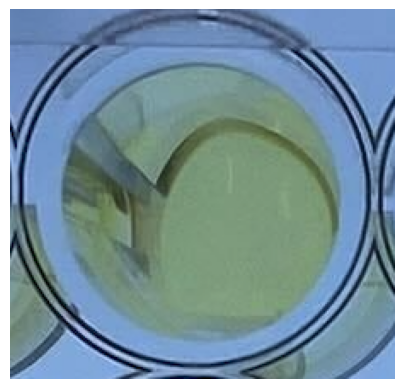

In [117]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tabulate import tabulate

# Load the trained model and scalers
model = joblib.load('../model/linear_regression_model.pkl_scaled')  # Adjust path if needed
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')

# Function to predict from a single value and return the log-transformed value
def predict_single_value_log(value):
    single_value = np.array([[value]])  # Reshape for a single feature
    single_value_scaled = scaler_X.transform(single_value)
    predicted_scaled = model.predict(single_value_scaled)
    predicted_log = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1)).ravel()
    return predicted_log[0]

# Function to convert log value to CFU/ml
def log_to_cfu(predicted_log):
    return 10 ** predicted_log

# Function to format CFU/ml in 10^x format without decimals
def format_cfu_as_power(cfu_value):
    if cfu_value > 0:
        exponent = np.log10(cfu_value)
        rounded_exponent = round(exponent)  # Round to the nearest integer
        return f"10^{rounded_exponent}"
    else:
        return "0"

# Function to display image based on the formatted CFU/ml value
def display_image(formatted_cfu):
    image_path = f'../data/{formatted_cfu}.png'
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Image file for {formatted_cfu} not found.")

# Ask the user for input value
user_input = float(input("Enter a single value: "))

# Predict based on the user input
predicted_log = predict_single_value_log(user_input)
predicted_cfu = log_to_cfu(predicted_log)
formatted_cfu = format_cfu_as_power(predicted_cfu)

# Create a DataFrame to display the result
df_result = pd.DataFrame({
    'Input Value': [user_input],
    'Predicted Log Value': [predicted_log],
    'Predicted CFU/ml': [predicted_cfu],
    'Formatted CFU/ml': [formatted_cfu]
})

# Print the DataFrame as a formatted table
print("\nPrediction Result:")
print(tabulate(df_result, headers='keys', tablefmt='grid', floatfmt='.4f'))

# Display the corresponding image
display_image(formatted_cfu)